In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (10, 6)

In [18]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')

print("Размер датасета:", df.shape)
print("\nПервые 5 строк:")
df.head()

Размер датасета: (1599, 12)

Первые 5 строк:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [19]:
description = """
 ОПИСАНИЕ ДАТАСЕТА "WINE QUALITY"

Предметная область: Химический состав и качество красного вина
Источник данных: UCI Machine Learning Repository
Характер данных: Реальные экспериментальные данные

Атрибуты:
- fixed acidity (числовой): Фиксированная кислотность
- volatile acidity (числовой): Летучая кислотность
- citric acid (числовой): Лимонная кислота
- residual sugar (числовой): Остаточный сахар
- chlorides (числовой): Хлориды
- free sulfur dioxide (числовой): Свободный диоксид серы
- total sulfur dioxide (числовой): Общий диоксид серы
- density (числовой): Плотность
- pH (числовой): Уровень pH
- sulphates (числовой): Сульфаты
- alcohol (числовой): Содержание алкоголя
- quality (числовой): Качество (целевая переменная, 0-10)

Задача анализа: Исследование взаимосвязей между химическими показателями и качеством вина
"""

print(description)


 ОПИСАНИЕ ДАТАСЕТА "WINE QUALITY"

Предметная область: Химический состав и качество красного вина
Источник данных: UCI Machine Learning Repository
Характер данных: Реальные экспериментальные данные

Атрибуты:
- fixed acidity (числовой): Фиксированная кислотность
- volatile acidity (числовой): Летучая кислотность  
- citric acid (числовой): Лимонная кислота
- residual sugar (числовой): Остаточный сахар
- chlorides (числовой): Хлориды
- free sulfur dioxide (числовой): Свободный диоксид серы
- total sulfur dioxide (числовой): Общий диоксид серы
- density (числовой): Плотность
- pH (числовой): Уровень pH
- sulphates (числовой): Сульфаты
- alcohol (числовой): Содержание алкоголя
- quality (числовой): Качество (целевая переменная, 0-10)

Задача анализа: Исследование взаимосвязей между химическими показателями и качеством вина



In [20]:
print("БАЗОВАЯ ИНФОРМАЦИЯ О ДАННЫХ:")
print("="*50)
print(f"Размер данных: {df.shape[0]} строк, {df.shape[1]} столбцов")
print(f"\nТипы данных:")
print(df.dtypes)
print(f"\nПропущенные значения: {df.isnull().sum().sum()}")
print(f"\nДубликаты: {df.duplicated().sum()}")

БАЗОВАЯ ИНФОРМАЦИЯ О ДАННЫХ:
Размер данных: 1599 строк, 12 столбцов

Типы данных:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Пропущенные значения: 0

Дубликаты: 240


In [21]:
print("СТАТИСТИЧЕСКОЕ ОПИСАНИЕ:")
df.describe()

СТАТИСТИЧЕСКОЕ ОПИСАНИЕ:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000



АНАЛИЗ ПРИЗНАКА: FIXED ACIDITY
Среднее: 8.3196
Стандартное отклонение: 1.7411
Медиана: 7.9000
Минимум: 4.6000
Максимум: 15.9000
Пропуски: 0
Выбросы (метод IQR): 49


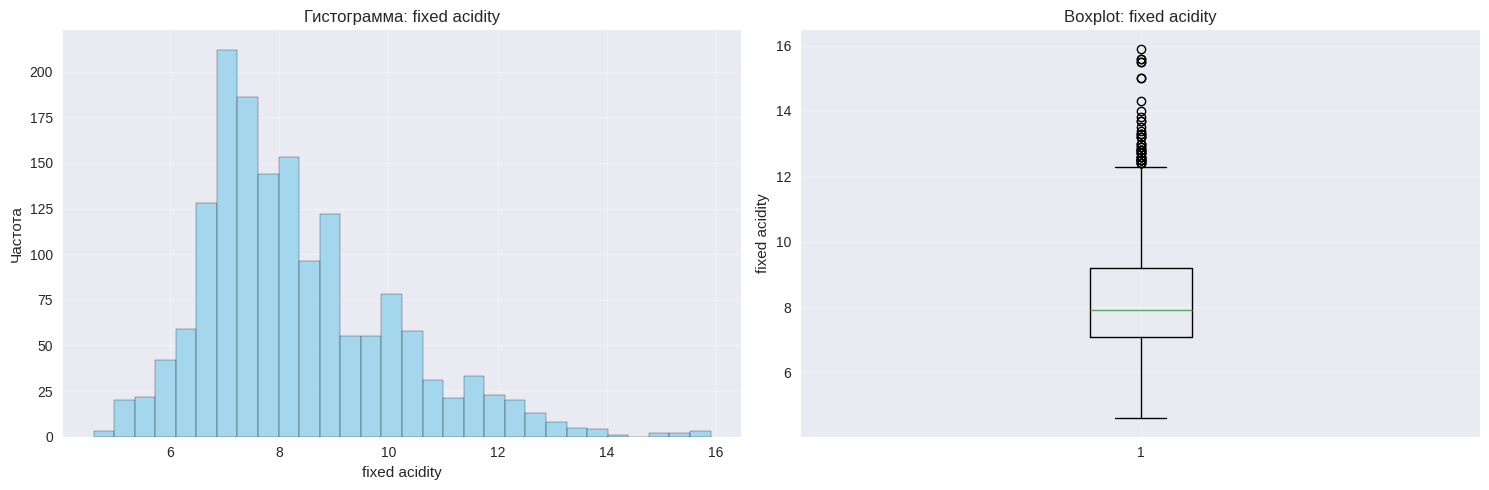


АНАЛИЗ ПРИЗНАКА: VOLATILE ACIDITY
Среднее: 0.5278
Стандартное отклонение: 0.1791
Медиана: 0.5200
Минимум: 0.1200
Максимум: 1.5800
Пропуски: 0
Выбросы (метод IQR): 19


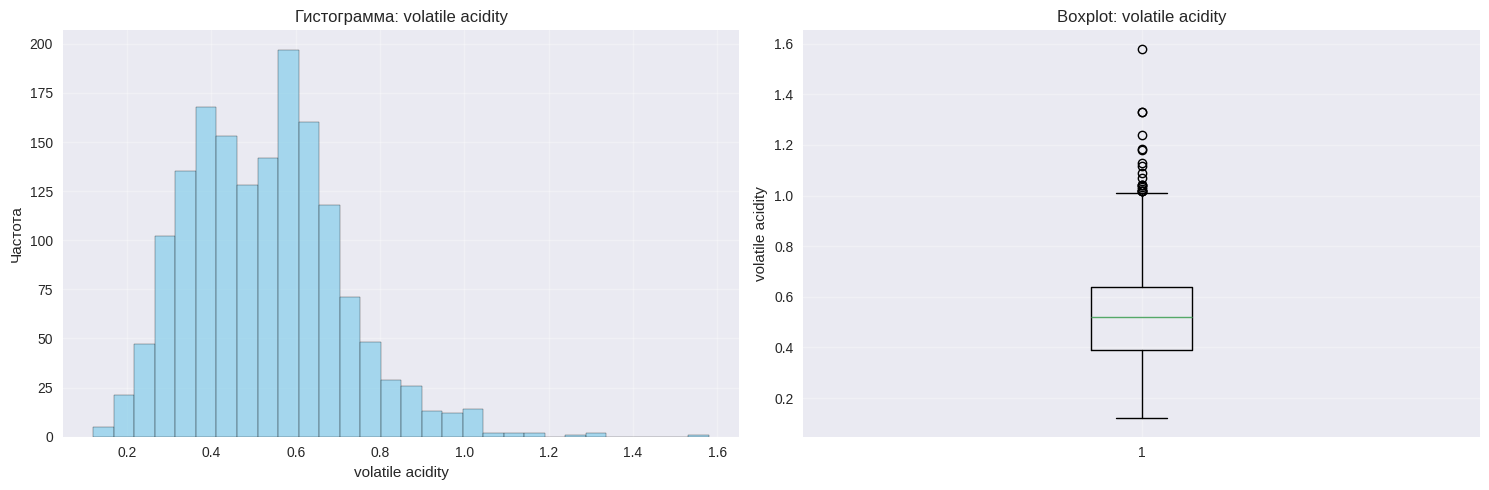


АНАЛИЗ ПРИЗНАКА: CITRIC ACID
Среднее: 0.2710
Стандартное отклонение: 0.1948
Медиана: 0.2600
Минимум: 0.0000
Максимум: 1.0000
Пропуски: 0
Выбросы (метод IQR): 1


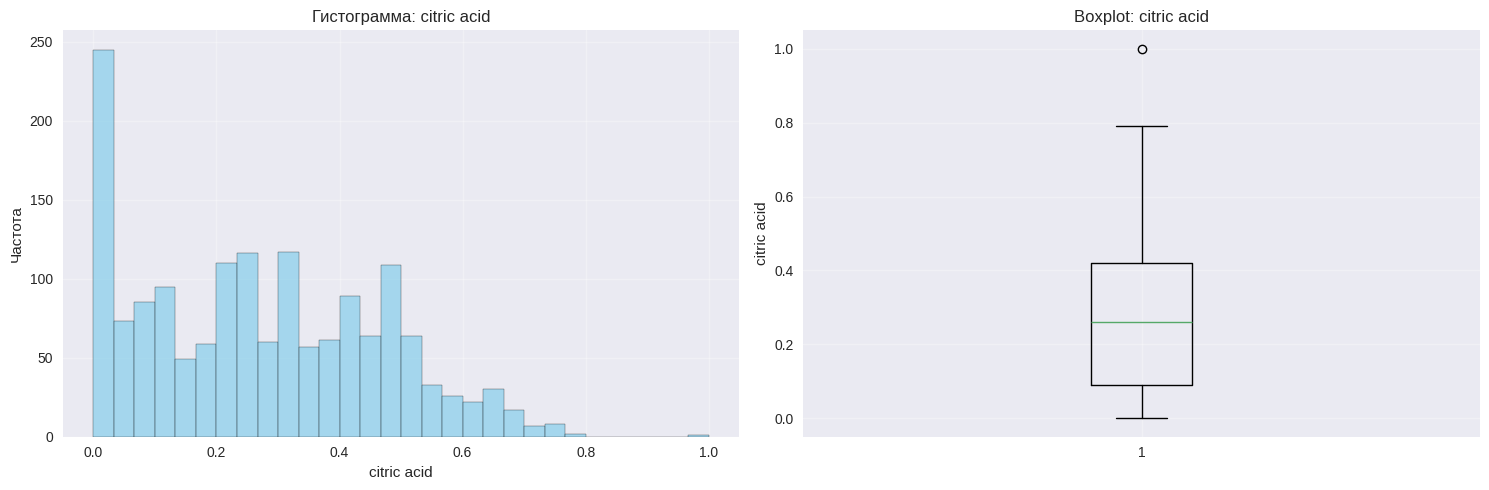


АНАЛИЗ ПРИЗНАКА: RESIDUAL SUGAR
Среднее: 2.5388
Стандартное отклонение: 1.4099
Медиана: 2.2000
Минимум: 0.9000
Максимум: 15.5000
Пропуски: 0
Выбросы (метод IQR): 155


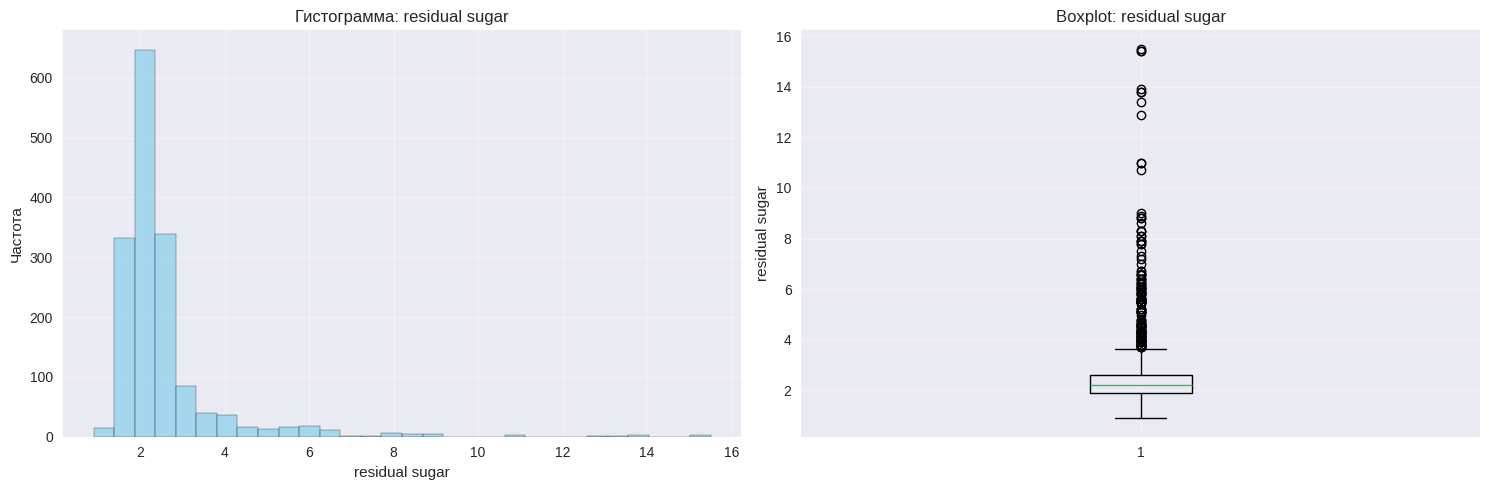


АНАЛИЗ ПРИЗНАКА: CHLORIDES
Среднее: 0.0875
Стандартное отклонение: 0.0471
Медиана: 0.0790
Минимум: 0.0120
Максимум: 0.6110
Пропуски: 0
Выбросы (метод IQR): 112


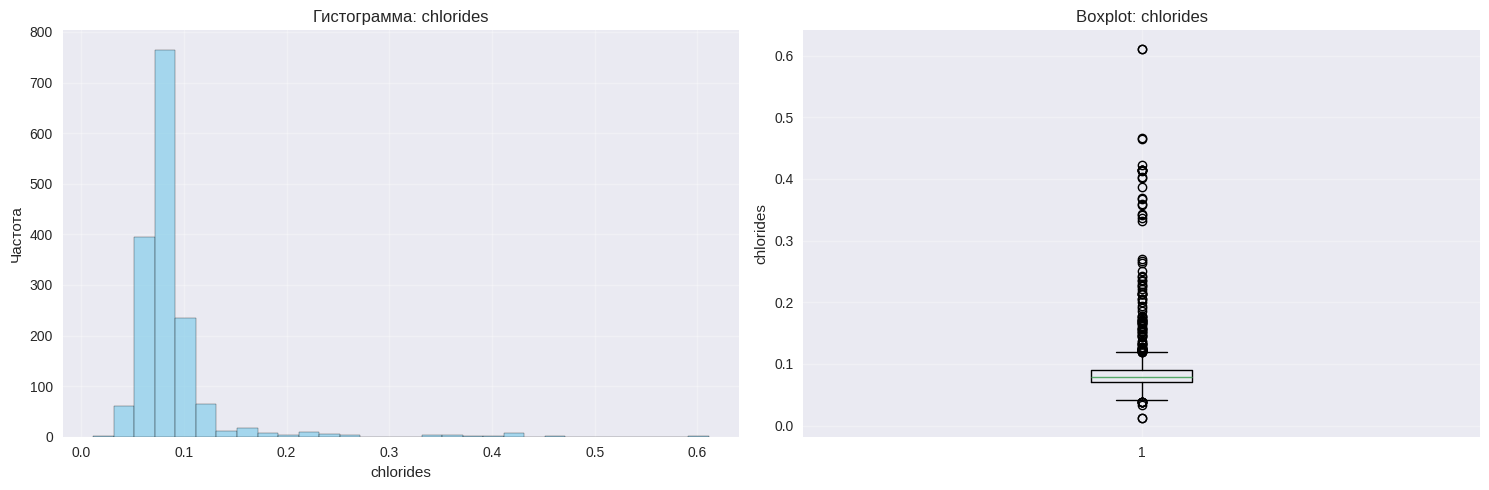


АНАЛИЗ ПРИЗНАКА: FREE SULFUR DIOXIDE
Среднее: 15.8749
Стандартное отклонение: 10.4602
Медиана: 14.0000
Минимум: 1.0000
Максимум: 72.0000
Пропуски: 0
Выбросы (метод IQR): 30


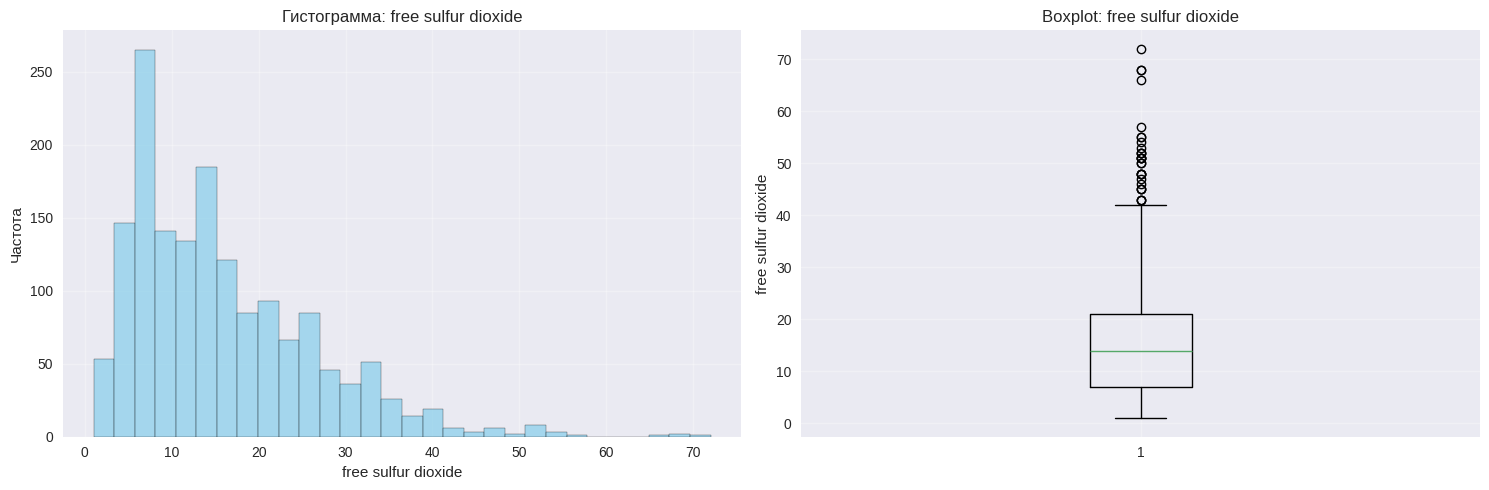


АНАЛИЗ ПРИЗНАКА: TOTAL SULFUR DIOXIDE
Среднее: 46.4678
Стандартное отклонение: 32.8953
Медиана: 38.0000
Минимум: 6.0000
Максимум: 289.0000
Пропуски: 0
Выбросы (метод IQR): 55


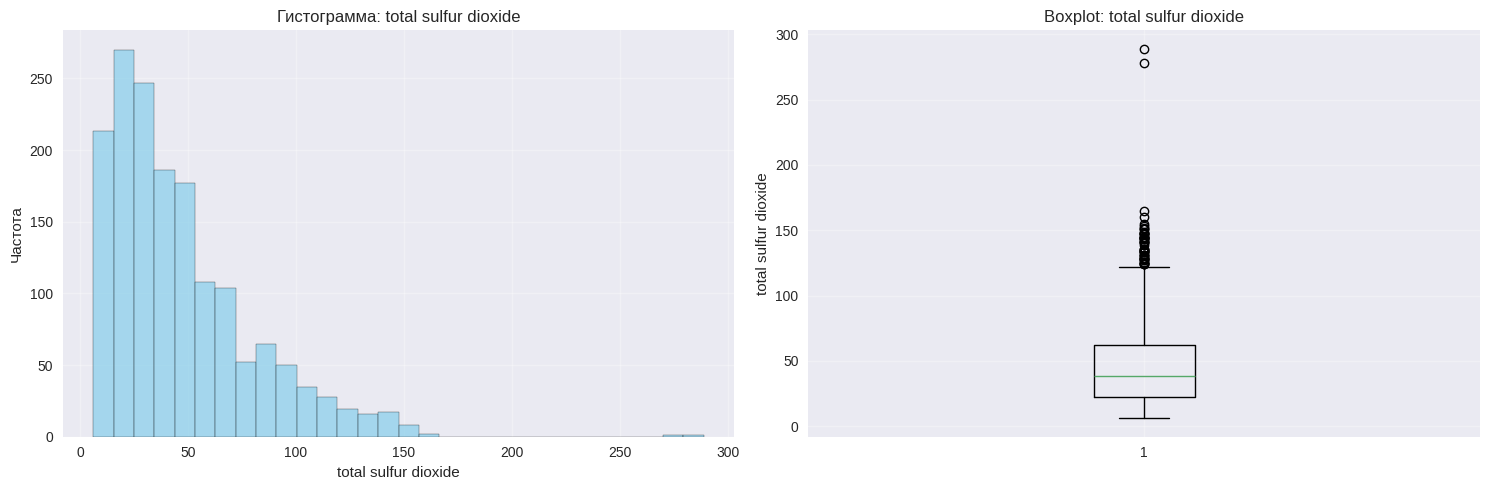


АНАЛИЗ ПРИЗНАКА: DENSITY
Среднее: 0.9967
Стандартное отклонение: 0.0019
Медиана: 0.9968
Минимум: 0.9901
Максимум: 1.0037
Пропуски: 0
Выбросы (метод IQR): 45


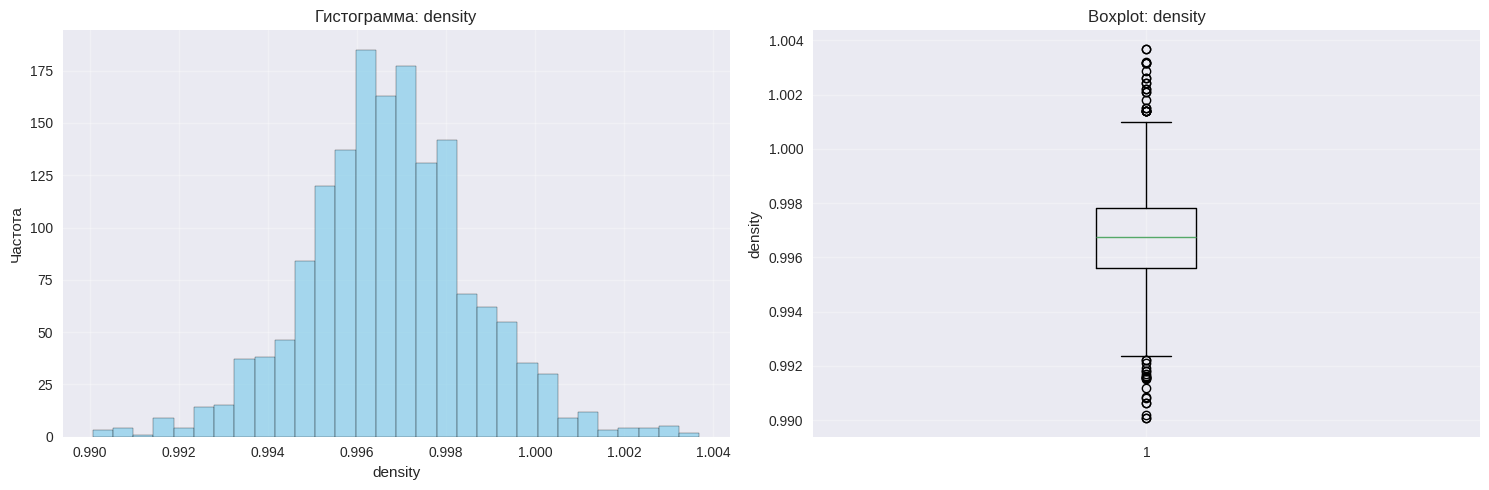


АНАЛИЗ ПРИЗНАКА: PH
Среднее: 3.3111
Стандартное отклонение: 0.1544
Медиана: 3.3100
Минимум: 2.7400
Максимум: 4.0100
Пропуски: 0
Выбросы (метод IQR): 35


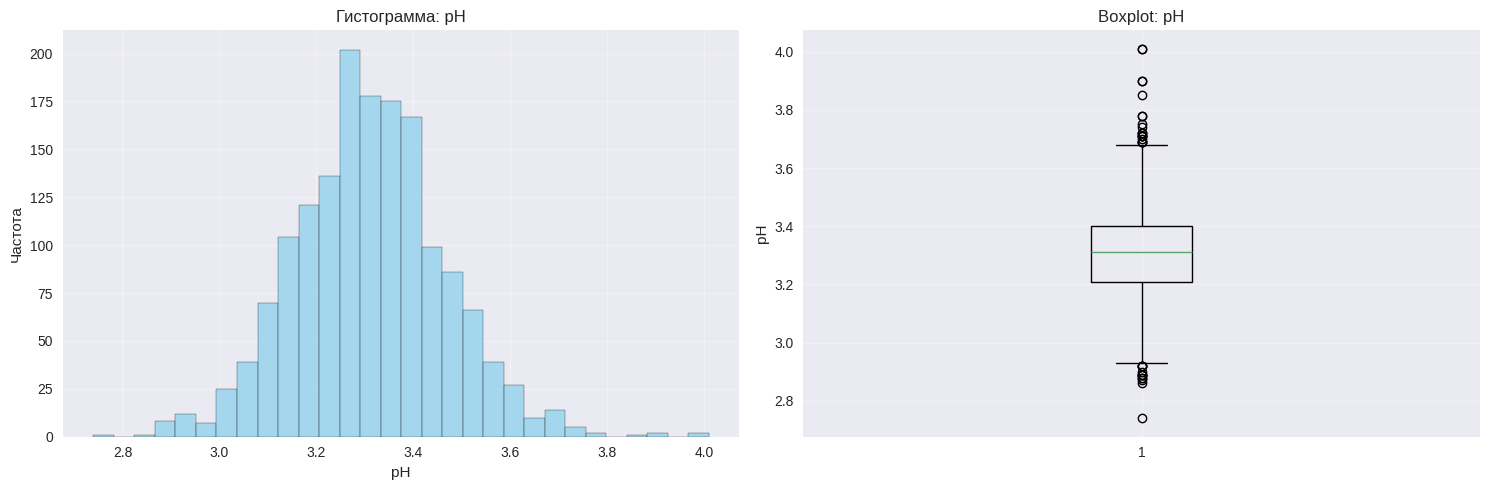


АНАЛИЗ ПРИЗНАКА: SULPHATES
Среднее: 0.6581
Стандартное отклонение: 0.1695
Медиана: 0.6200
Минимум: 0.3300
Максимум: 2.0000
Пропуски: 0
Выбросы (метод IQR): 59


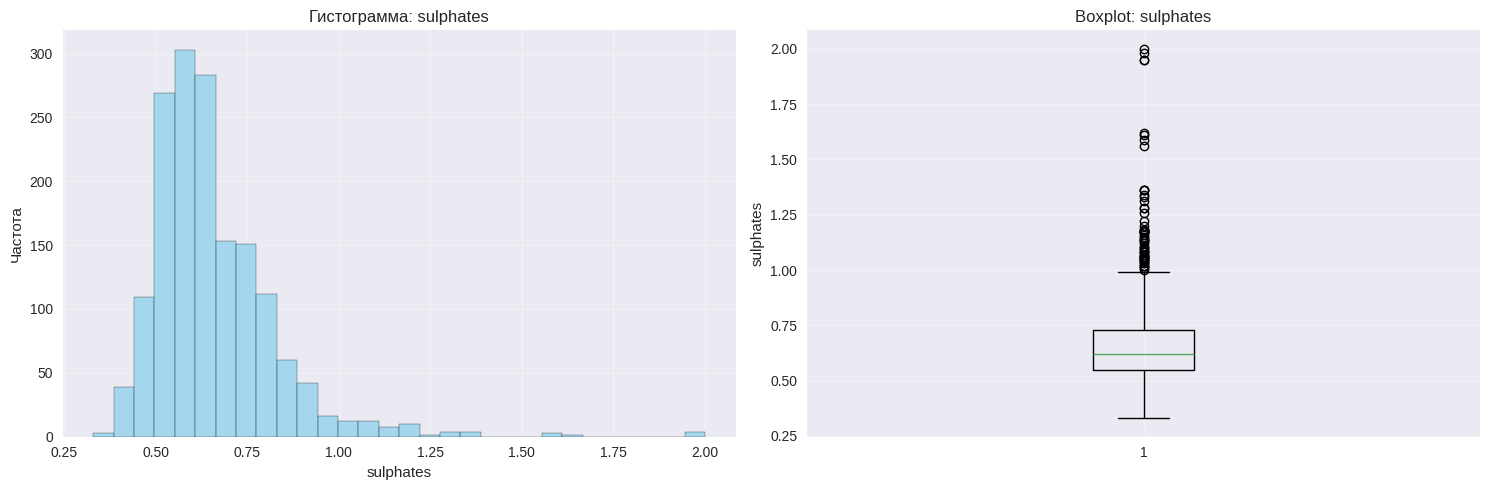


АНАЛИЗ ПРИЗНАКА: ALCOHOL
Среднее: 10.4230
Стандартное отклонение: 1.0657
Медиана: 10.2000
Минимум: 8.4000
Максимум: 14.9000
Пропуски: 0
Выбросы (метод IQR): 13


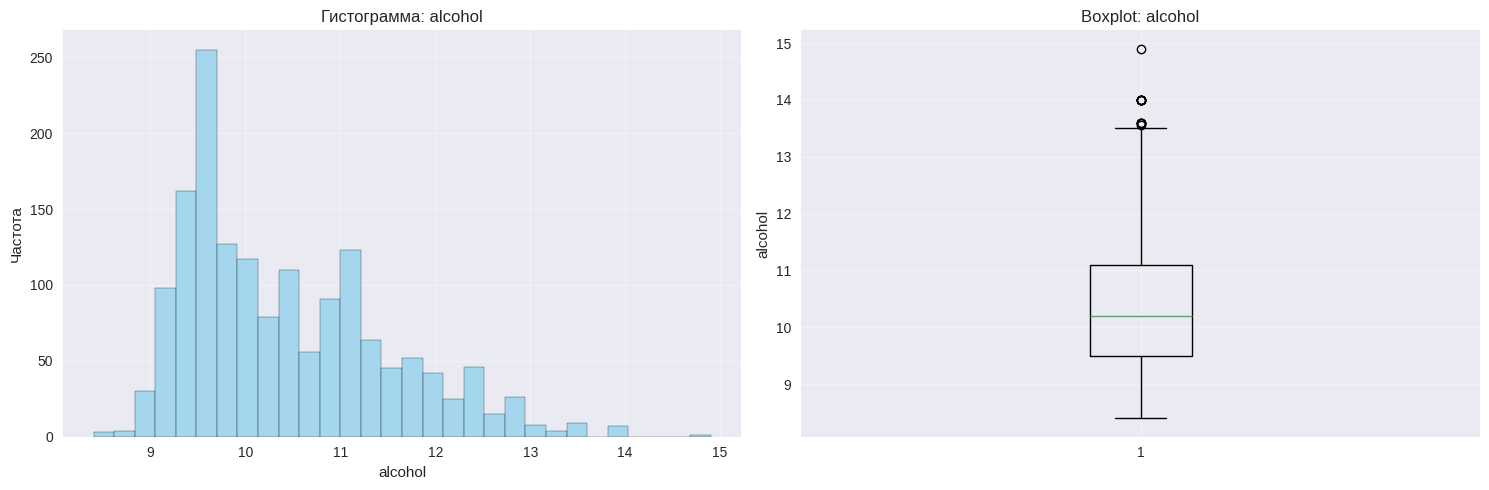


АНАЛИЗ ПРИЗНАКА: QUALITY
Среднее: 5.6360
Стандартное отклонение: 0.8076
Медиана: 6.0000
Минимум: 3
Максимум: 8
Пропуски: 0
Выбросы (метод IQR): 28


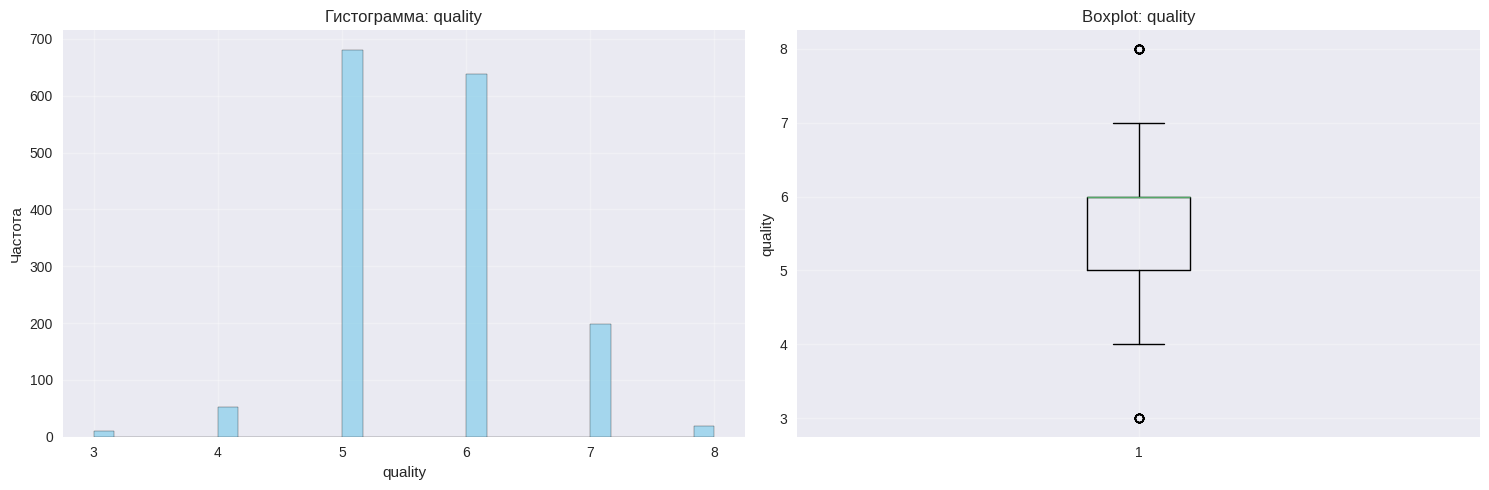

In [22]:
def analyze_feature(column, data):
    """Анализ отдельного признака"""
    print(f"\n{'='*60}")
    print(f"АНАЛИЗ ПРИЗНАКА: {column.upper()}")
    print(f"{'='*60}")


    stats = {
        'Среднее': data[column].mean(),
        'Стандартное отклонение': data[column].std(),
        'Медиана': data[column].median(),
        'Минимум': data[column].min(),
        'Максимум': data[column].max(),
        'Пропуски': data[column].isnull().sum()
    }

    for key, value in stats.items():
        print(f"{key}: {value:.4f}" if isinstance(value, float) else f"{key}: {value}")


    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f"Выбросы (метод IQR): {len(outliers)}")

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1.hist(data[column], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    ax1.set_title(f'Гистограмма: {column}')
    ax1.set_xlabel(column)
    ax1.set_ylabel('Частота')
    ax1.grid(True, alpha=0.3)

    ax2.boxplot(data[column])
    ax2.set_title(f'Boxplot: {column}')
    ax2.set_ylabel(column)
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return stats

results = {}
for column in df.columns:
    results[column] = analyze_feature(column, df)

In [23]:
print("АНАЛИЗ И ОБРАБОТКА ПРОПУЩЕННЫХ ЗНАЧЕНИЙ:")
print("="*50)

missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_info = pd.DataFrame({
    'Пропуски': missing_data,
    'Процент': missing_percent
})

print(missing_info)

if df.isnull().sum().sum() > 0:
    print("\nЗаполняем пропущенные значения медианой...")
    df_clean = df.fillna(df.median())
else:
    df_clean = df.copy()
    print("\nПропущенных значений не обнаружено")

print(f"\nПосле обработки пропусков: {df_clean.isnull().sum().sum()} пропущенных значений")

АНАЛИЗ И ОБРАБОТКА ПРОПУЩЕННЫХ ЗНАЧЕНИЙ:
                      Пропуски  Процент
fixed acidity                0      0.0
volatile acidity             0      0.0
citric acid                  0      0.0
residual sugar               0      0.0
chlorides                    0      0.0
free sulfur dioxide          0      0.0
total sulfur dioxide         0      0.0
density                      0      0.0
pH                           0      0.0
sulphates                    0      0.0
alcohol                      0      0.0
quality                      0      0.0

Пропущенных значений не обнаружено

После обработки пропусков: 0 пропущенных значений


МАТРИЦА КОРРЕЛЯЦИЙ ПИРСОНА:


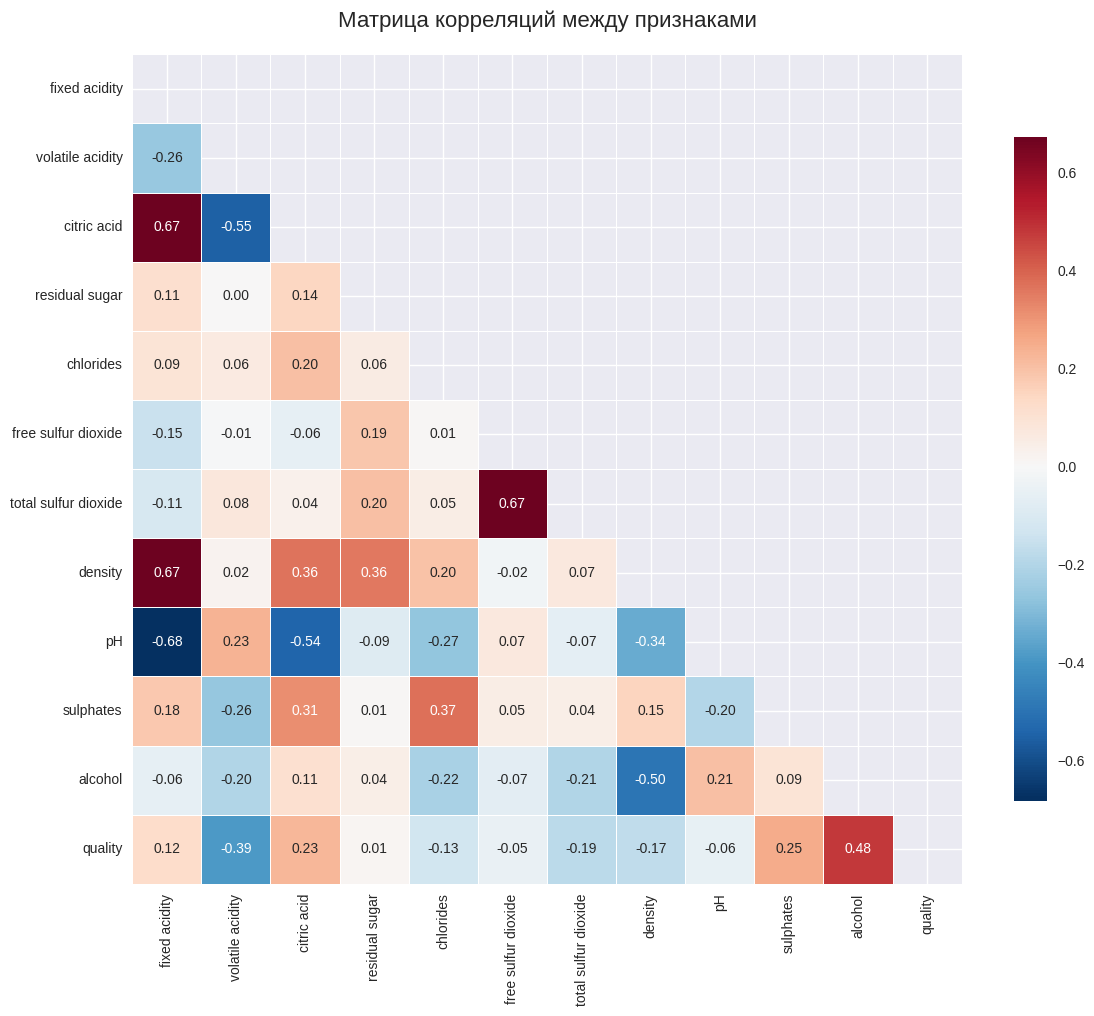

In [24]:
print("МАТРИЦА КОРРЕЛЯЦИЙ ПИРСОНА:")
print("="*50)

corr_matrix = df_clean.corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix,
            mask=mask,
            annot=True,
            cmap='RdBu_r',
            center=0,
            square=True,
            fmt='.2f',
            linewidths=0.5,
            cbar_kws={"shrink": .8})
plt.title('Матрица корреляций между признаками', fontsize=16, pad=20)
plt.tight_layout()
plt.show()


In [25]:
print("АНАЛИЗ КОРРЕЛЯЦИОННЫХ ВЗАИМОСВЯЗЕЙ:")
print("="*50)

high_corr = []
moderate_corr = []
low_corr = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        abs_corr = abs(corr_val)
        col1, col2 = corr_matrix.columns[i], corr_matrix.columns[j]

        if abs_corr > 0.7:
            high_corr.append((col1, col2, corr_val))
        elif abs_corr > 0.5:
            moderate_corr.append((col1, col2, corr_val))
        elif abs_corr < 0.1:
            low_corr.append((col1, col2, corr_val))

print(" ВЫСОКАЯ КОРРЕЛЯЦИЯ (> 0.7):")
for col1, col2, corr in high_corr:
    direction = "прямая" if corr > 0 else "обратная"
    print(f"  • {col1} ↔ {col2}: {corr:.3f} ({direction})")

print("\nУМЕРЕННАЯ КОРРЕЛЯЦИЯ (0.5 - 0.7):")
for col1, col2, corr in moderate_corr[:10]:
    direction = "прямая" if corr > 0 else "обратная"
    print(f"  • {col1} ↔ {col2}: {corr:.3f} ({direction})")

print("\n СЛАБАЯ КОРРЕЛЯЦИЯ (< 0.1):")
for col1, col2, corr in low_corr[:10]:
    print(f"  • {col1} ↔ {col2}: {corr:.3f}")

АНАЛИЗ КОРРЕЛЯЦИОННЫХ ВЗАИМОСВЯЗЕЙ:
 ВЫСОКАЯ КОРРЕЛЯЦИЯ (> 0.7):

УМЕРЕННАЯ КОРРЕЛЯЦИЯ (0.5 - 0.7):
  • fixed acidity ↔ citric acid: 0.672 (прямая)
  • fixed acidity ↔ density: 0.668 (прямая)
  • fixed acidity ↔ pH: -0.683 (обратная)
  • volatile acidity ↔ citric acid: -0.552 (обратная)
  • citric acid ↔ pH: -0.542 (обратная)
  • free sulfur dioxide ↔ total sulfur dioxide: 0.668 (прямая)

 СЛАБАЯ КОРРЕЛЯЦИЯ (< 0.1):
  • fixed acidity ↔ chlorides: 0.094
  • fixed acidity ↔ alcohol: -0.062
  • volatile acidity ↔ residual sugar: 0.002
  • volatile acidity ↔ chlorides: 0.061
  • volatile acidity ↔ free sulfur dioxide: -0.011
  • volatile acidity ↔ total sulfur dioxide: 0.076
  • volatile acidity ↔ density: 0.022
  • citric acid ↔ free sulfur dioxide: -0.061
  • citric acid ↔ total sulfur dioxide: 0.036
  • residual sugar ↔ chlorides: 0.056


МАТРИЦА ГРАФИКОВ РАССЕИВАНИЯ:


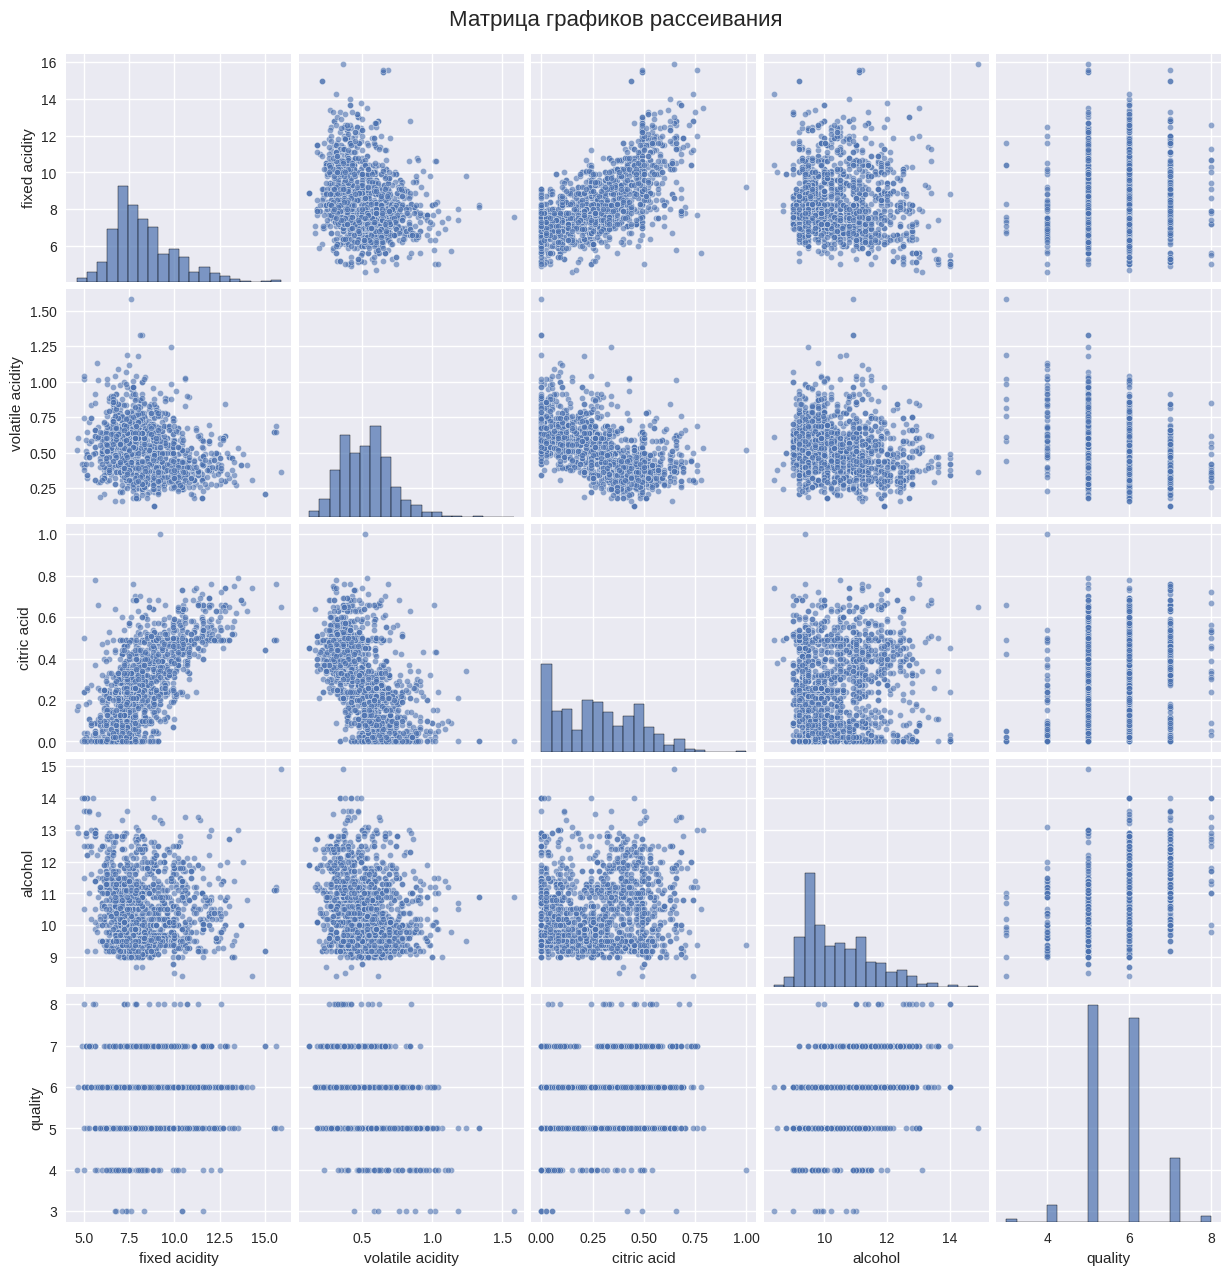

In [26]:
print("МАТРИЦА ГРАФИКОВ РАССЕИВАНИЯ:")
print("="*50)


selected_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'alcohol', 'quality']

sns.pairplot(df_clean[selected_features],
             diag_kind='hist',
             plot_kws={'alpha': 0.6, 's': 20},
             diag_kws={'alpha': 0.7, 'bins': 20})
plt.suptitle('Матрица графиков рассеивания', y=1.02, fontsize=16)
plt.show()

In [27]:
print("ДЕТАЛЬНЫЙ АНАЛИЗ СИЛЬНЫХ КОРРЕЛЯЦИЙ:")
print("="*50)

if high_corr:
    for col1, col2, corr_val in high_corr:
        print(f"\nАнализ связи: {col1} ↔ {col2} (корреляция: {corr_val:.3f})")

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

        ax1.scatter(df_clean[col1], df_clean[col2], alpha=0.6, color='blue')
        ax1.set_xlabel(col1)
        ax1.set_ylabel(col2)
        ax1.set_title(f'Scatter plot: {col1} vs {col2}')
        ax1.grid(True, alpha=0.3)

        slope, intercept, r_value, p_value, std_err = stats.linregress(df_clean[col1], df_clean[col2])
        line = slope * df_clean[col1] + intercept

        ax2.scatter(df_clean[col1], df_clean[col2], alpha=0.6, color='green')
        ax2.plot(df_clean[col1], line, 'r-', linewidth=2, label=f'R² = {r_value**2:.3f}')
        ax2.set_xlabel(col1)
        ax2.set_ylabel(col2)
        ax2.set_title(f'Линейная регрессия')
        ax2.legend()
        ax2.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        print(f"  Коэффициент детерминации R²: {r_value**2:.3f}")
        print(f"  p-value: {p_value:.4f}")
        print(f"  Характер: {'Прямая зависимость' if corr_val > 0 else 'Обратная зависимость'}")
else:
    print("Сильно коррелированных пар не обнаружено")

ДЕТАЛЬНЫЙ АНАЛИЗ СИЛЬНЫХ КОРРЕЛЯЦИЙ:
Сильно коррелированных пар не обнаружено


КОРРЕЛЯЦИЯ ПРИЗНАКОВ С КАЧЕСТВОМ ВИНА:


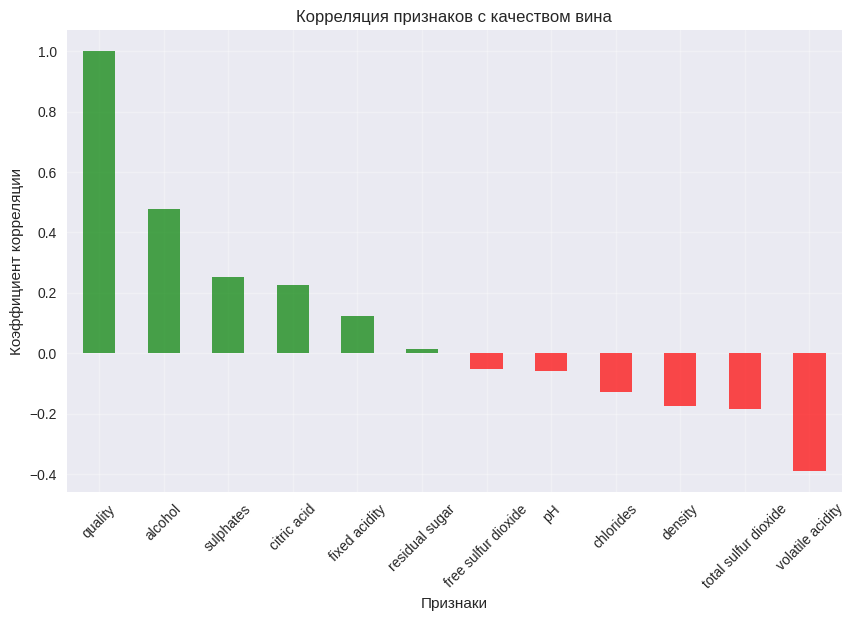

Ранжирование признаков по влиянию на качество:
  • alcohol: 0.476 (положительное влияние)
  • sulphates: 0.251 (положительное влияние)
  • citric acid: 0.226 (положительное влияние)
  • fixed acidity: 0.124 (положительное влияние)
  • residual sugar: 0.014 (положительное влияние)
  • free sulfur dioxide: -0.051 (отрицательное влияние)
  • pH: -0.058 (отрицательное влияние)
  • chlorides: -0.129 (отрицательное влияние)
  • density: -0.175 (отрицательное влияние)
  • total sulfur dioxide: -0.185 (отрицательное влияние)
  • volatile acidity: -0.391 (отрицательное влияние)


In [28]:
print("КОРРЕЛЯЦИЯ ПРИЗНАКОВ С КАЧЕСТВОМ ВИНА:")
print("="*50)

quality_corr = corr_matrix['quality'].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
colors = ['red' if x < 0 else 'green' for x in quality_corr]
quality_corr.plot(kind='bar', color=colors, alpha=0.7)
plt.title('Корреляция признаков с качеством вина')
plt.xlabel('Признаки')
plt.ylabel('Коэффициент корреляции')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

print("Ранжирование признаков по влиянию на качество:")
for feature, corr in quality_corr.items():
    if feature != 'quality':
        direction = "положительное" if corr > 0 else "отрицательное"
        print(f"  • {feature}: {corr:.3f} ({direction} влияние)")

In [29]:
print("ИТОГОВЫЙ АНАЛИЗ И ВЫВОДЫ:")
print("="*50)

print(f"\nОБЩАЯ ИНФОРМАЦИЯ:")
print(f"   • Датасет: {df.shape[0]} наблюдений, {df.shape[1]} признаков")
print(f"   • Целевая переменная: quality")
print(f"   • Пропущенных значений: {df.isnull().sum().sum()}")

print(f"\nКЛЮЧЕВЫЕ СТАТИСТИКИ:")
print(f"   • Сильно коррелированных пар: {len(high_corr)}")
print(f"   • Признаки с наибольшим влиянием на качество:")
top_features = quality_corr[1:4]  # Исключаем quality itself
for feature, corr in top_features.items():
    print(f"     - {feature}: {corr:.3f}")

print(f"\n📈 ВЫБРОСЫ:")
outlier_summary = {}
for column in df.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < Q1 - 1.5*IQR) | (df[column] > Q3 + 1.5*IQR)]
    outlier_summary[column] = len(outliers)

top_outliers = sorted(outlier_summary.items(), key=lambda x: x[1], reverse=True)[:3]
for feature, count in top_outliers:
    print(f"     - {feature}: {count} выбросов")

print(f"\nРЕКОМЕНДАЦИИ ДЛЯ ДАЛЬНЕЙШЕГО АНАЛИЗА:")
print(f"   1. Удалить или преобразовать выбросы в residual sugar, chlorides, free sulfur dioxide")
print(f"   2. Использовать alcohol, volatile acidity, sulphates как ключевые предикторы")
print(f"   3. Рассмотреть возможность исключения сильно коррелированных признаков")
print(f"   4. Применить масштабирование данных для алгоритмов машинного обучения")
print(f"   5. Для кластеризации использовать PCA для уменьшения размерности")

print(f"\nПЕРСПЕКТИВЫ:")
print(f"   • Кластеризация: Группировка вин по химическому составу")
print(f"   • Классификация: Предсказание категории качества")
print(f"   • Регрессия: Точечное предсказание оценки качества")

ИТОГОВЫЙ АНАЛИЗ И ВЫВОДЫ:

ОБЩАЯ ИНФОРМАЦИЯ:
   • Датасет: 1599 наблюдений, 12 признаков
   • Целевая переменная: quality
   • Пропущенных значений: 0

КЛЮЧЕВЫЕ СТАТИСТИКИ:
   • Сильно коррелированных пар: 0
   • Признаки с наибольшим влиянием на качество:
     - alcohol: 0.476
     - sulphates: 0.251
     - citric acid: 0.226

📈 ВЫБРОСЫ:
     - residual sugar: 155 выбросов
     - chlorides: 112 выбросов
     - sulphates: 59 выбросов

РЕКОМЕНДАЦИИ ДЛЯ ДАЛЬНЕЙШЕГО АНАЛИЗА:
   1. Удалить или преобразовать выбросы в residual sugar, chlorides, free sulfur dioxide
   2. Использовать alcohol, volatile acidity, sulphates как ключевые предикторы
   3. Рассмотреть возможность исключения сильно коррелированных признаков
   4. Применить масштабирование данных для алгоритмов машинного обучения
   5. Для кластеризации использовать PCA для уменьшения размерности

ПЕРСПЕКТИВЫ:
   • Кластеризация: Группировка вин по химическому составу
   • Классификация: Предсказание категории качества
   • Регрессия

In [30]:
df_clean.to_csv('wine_quality_processed.csv', index=False)

report = {
    'dataset': 'Wine Quality',
    'original_shape': df.shape,
    'processed_shape': df_clean.shape,
    'missing_values': df.isnull().sum().sum(),
    'high_correlations': len(high_corr),
    'top_features': list(quality_corr[1:4].index)
}

print("ОТЧЕТ СОХРАНЕН:")
for key, value in report.items():
    print(f"  {key}: {value}")

print(f"\nОбработанные данные сохранены в 'wine_quality_processed.csv'")

ОТЧЕТ СОХРАНЕН:
  dataset: Wine Quality
  original_shape: (1599, 12)
  processed_shape: (1599, 12)
  missing_values: 0
  high_correlations: 0
  top_features: ['alcohol', 'sulphates', 'citric acid']

Обработанные данные сохранены в 'wine_quality_processed.csv'
